# Image Classification Demo
##### Author: Jared Wilber

This notebooks demos an example of an image classification algorithm fine-tuned to predict particular classes. In our case, the model has been trained explicitly to predict whether or not a given photo is of a ground transformer or an electrical transformer.

Under the hood, I fine-tuned the VGG16 neural network, originally used for imagenet (a 10,000 class image classification competition). 

While the below example only works for the two types of transformers, given <i>enough</i> (>= ~150) images it could theoretically be extended to predict anything.

<i>Note that this algorithm does <b>not</b> do multi-class predictions (i.e., multiple classes per image), though such algorithms exist (they just take a little more time to implement/train).</i>

In [1]:
# import required libraries
%matplotlib inline
import PIL
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.keras.models import load_model

/Users/jared/miniconda2/envs/flaskpoc/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# load pretrained model into environment
model = load_model('../flask_apps/two_class_model.h5')

In [4]:
class_names = ['ground_transformer', 'pole_transformer']

In [5]:
# define function to output predictions
def classify_image(image_path):
    """
    Use a pre-trained model to predict an image.
    
    Parameters
    ----------
    image_path: str
        Path to image with which we want to classify.
    """
    # open image, resize, and correctly format for classification
    img = PIL.Image.open(image_path)
    img_resized = img.resize((224, 224), PIL.Image.LANCZOS)
    
    # plot image
    plt.imshow(img_resized)
    plt.show()
    
    # convert image to numpy array
    img_array = np.expand_dims(np.array(img_resized), axis=0)
    
    # Use saved model to classify image
    y_pred = model.predict(img_array)
    y_proba = model.predict_proba(img_array)
    cls_pred = np.argmax(y_pred, axis=1)
    pred_class = class_names[cls_pred[0]]
    pred_proba = y_proba[0][cls_pred][0]
    print("Predicted Class: {}".format(pred_class))
    print("Probability of Class Assignment: {}".format(pred_proba))
    

After loading the model and defining our `classify_image` function, predictions are as simple as:

    classify_image(<local/path/to/image>)
    
Below are some examples:

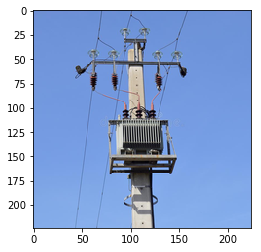

Predicted Class: pole_transformer
Probability of Class Assignment: 1.0


In [6]:
# generate some predictions
classify_image('../images/poletransformer2.jpg')

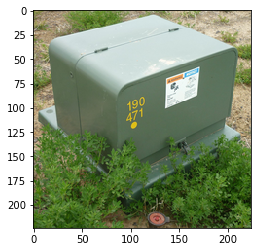

Predicted Class: ground_transformer
Probability of Class Assignment: 1.0


In [7]:
classify_image('../images/groundtransformer1.jpg')

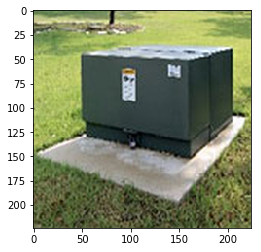

Predicted Class: ground_transformer
Probability of Class Assignment: 1.0


In [8]:
classify_image('../images/groundtransformer2.jpg')